In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
from io import StringIO

In [2]:
plt.rcParams['text.usetex'] = True
plt.rcParams['axes.labelsize'] = 24
plt.rcParams['figure.figsize']=(7,6)

In [3]:
data15 = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	0.012
2011	1+2,3+4	1	2	438	861	34384	5.46	5.09	8	1.15	1	0.084
2011	1,2,3,4	1	4	438	1683	121749	5.78	5.05	10	1.23	1	0.29
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	120	10.97	3.46	1.9
2011	1+2,3+4	2	2	438	17203	614472	4.11	3.75	209	13.51	3.6	6.7
2011	1,2,3,4	2	4	438	30489	2014650	4.32	3.69	218	12.28	3.71	27
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3759	9.13	3.95	264
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92	6293	17.64	5.81	1057
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86	6195	16.22	4.81	2607
"""

In [4]:
d15 = pd.read_csv(StringIO(data15), sep='\t')

In [5]:
d15.head()

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3,1.00,1.00,0.012
1,2011,"1+2,3+4",1,2,438,861,34384,5.46,5.09,8,1.15,1.00,0.084
2,2011,"1,2,3,4",1,4,438,1683,121749,5.78,5.05,10,1.23,1.00,0.290
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,120,10.97,3.46,1.900
4,2011,"1+2,3+4",2,2,438,17203,614472,4.11,3.75,209,13.51,3.60,6.700


In [6]:
d15.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 13 columns):
Year                     9 non-null int64
Quarters                 9 non-null object
Markov order             9 non-null int64
Layers                   9 non-null int64
Physical nodes           9 non-null int64
State nodes              9 non-null int64
Links                    9 non-null int64
State entropy rate       9 non-null float64
Physical entropy rate    9 non-null float64
Modules                  9 non-null int64
Module perplexity        9 non-null float64
Overlap                  9 non-null float64
Seconds                  9 non-null float64
dtypes: float64(5), int64(7), object(1)
memory usage: 1016.0+ bytes


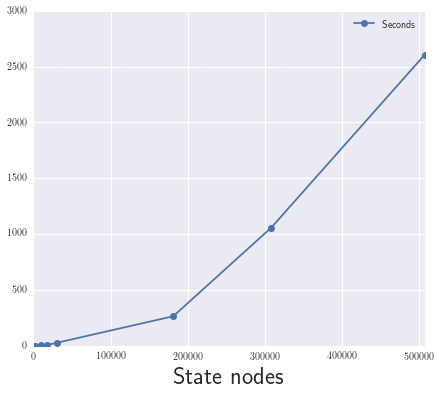

In [7]:
d15.plot(x='State nodes', y='Seconds', style='o-');

In [8]:
def plotTimeComplexities(Seconds, N_S, N_L, title):
    Y = Seconds.values
#     title='Infomap time complexity as a function of number of state nodes $N_S$ and number of links $N_L$'
    fig, axes = plt.subplots(nrows=4, ncols=3, figsize = (15,20))
    fig.suptitle(title, fontsize=20)
    pd.Series(Y, index=N_S.values).rename_axis('$N_S$').plot(ax=axes[0,0], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)).values).rename_axis('$N_S*log(N_S)$').plot(ax=axes[0,1], style='o-');
    pd.Series(Y, index=(N_S*N_S).values).rename_axis('$N_S*N_S$').plot(ax=axes[0,2], style='o-');
    pd.Series(Y, index=N_L.values).rename_axis('$N_L$').plot(ax=axes[1,0], style='o-');
    pd.Series(Y, index=(N_L*np.log(N_L)).values).rename_axis('$N_L*log(N_L)$').plot(ax=axes[1,1], style='o-');
    pd.Series(Y, index=(N_L*N_L).values).rename_axis('$N_L*N_L$').plot(ax=axes[1,2], style='o-');
    pd.Series(Y, index=(N_S*N_L).values).rename_axis('$N_S*N_L$').plot(ax=axes[2,0], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)*N_L).values).rename_axis('$N_S*log(N_S)*N_L$').plot(ax=axes[2,1], style='o-');
    pd.Series(Y, index=(N_S*N_L*np.log(N_L)).values).rename_axis('$N_S*N_L*log(N_L)$').plot(ax=axes[2,2], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_L)).values).rename_axis('$N_S*log(N_L)$').plot(ax=axes[3,0], style='o-');
    pd.Series(Y, index=(np.log(N_S)*N_L).values).rename_axis('$log(N_S)*N_L$').plot(ax=axes[3,1], style='o-');
    pd.Series(Y, index=(N_S*np.log(N_S)*np.log(N_L)).values).rename_axis('$N_S*log(N_S)*log(N_L)$').plot(ax=axes[3,2], style='o-');
    plt.tight_layout(pad=4)

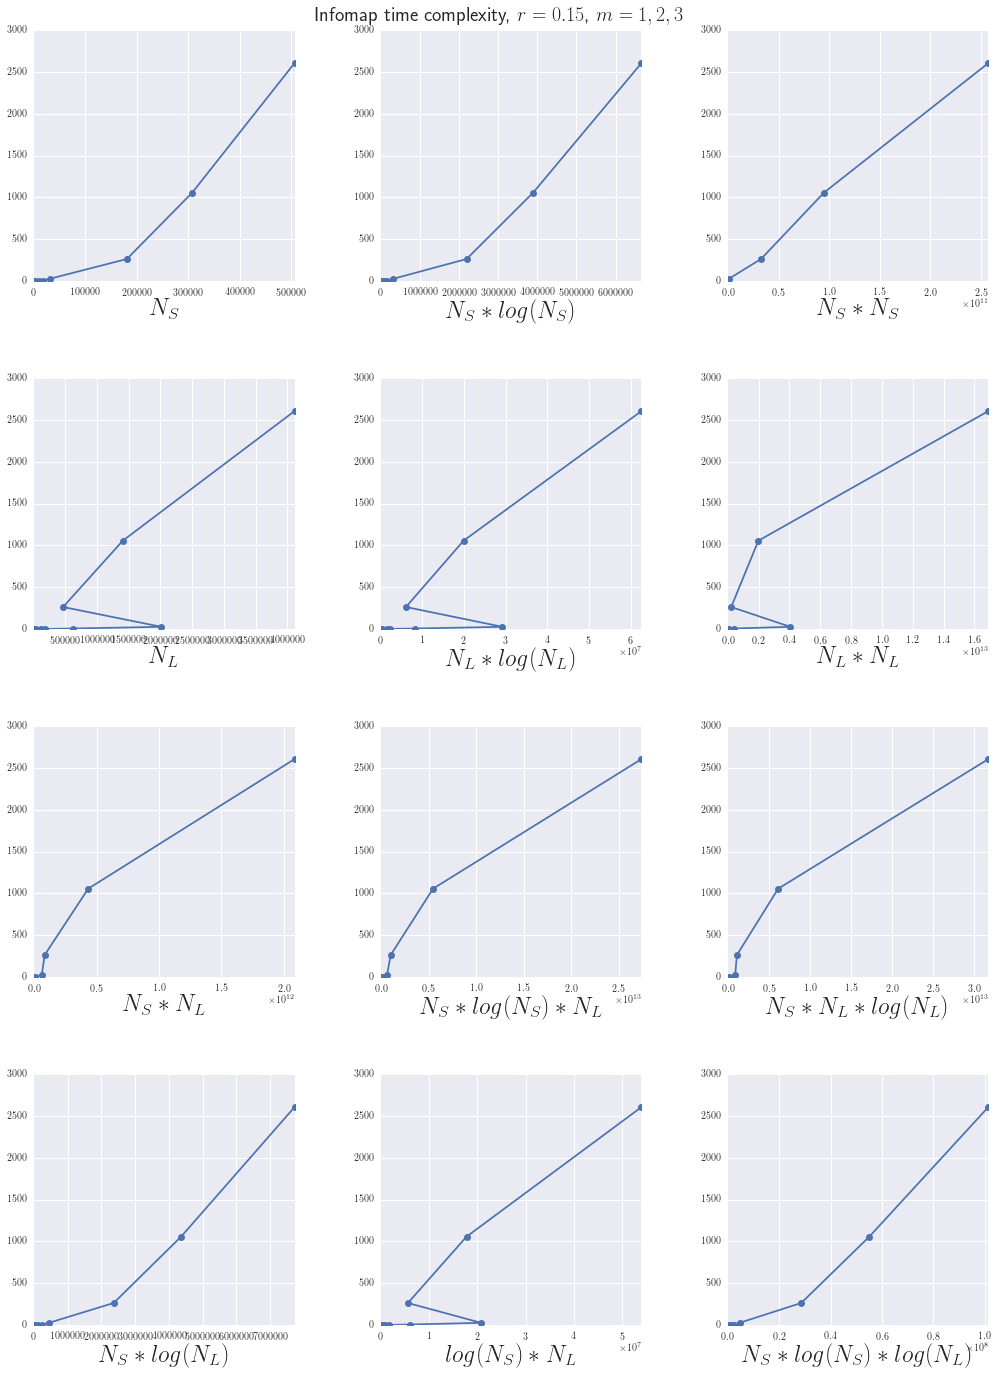

In [9]:
plotTimeComplexities(d15['Seconds'], N_S=d15['State nodes'], N_L=d15['Links'],
                     title="Infomap time complexity, $r=0.15$, $m=1,2,3$")

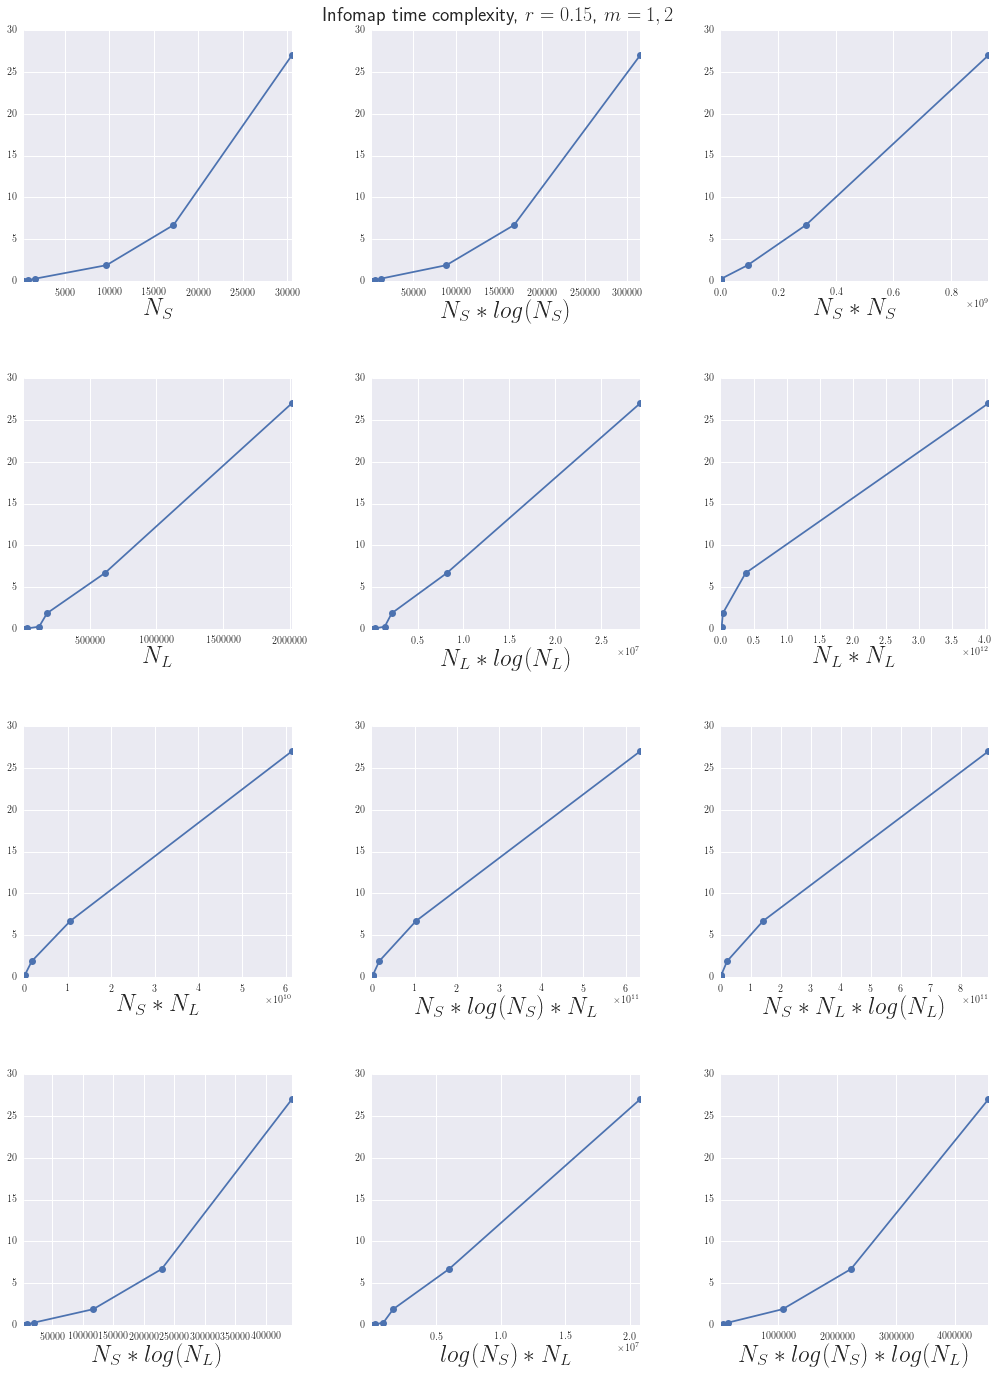

In [10]:
plotTimeComplexities(d15['Seconds'][0:6], N_S=d15['State nodes'][0:6], N_L=d15['Links'][0:6],
                     title="Infomap time complexity, $r=0.15$, $m=1,2$")

In [11]:
data25 = """
Year	Quarters	Markov order	Layers	Physical nodes	State nodes	Links	State entropy rate	Physical entropy rate	Modules	Module perplexity	Overlap	Seconds
2011	1+2+3+4	1	1	438	438	9681	5.11	5.11	3	1	1	0.012
2011	1+2,3+4	1	2	438	861	34384	5.55	5.05	13	1.24	1	0.055
2011	1,2,3,4	1	4	438	1683	121749	6	4.96	21	4.01	1	0.13
2011	1+2+3+4	2	1	438	9681	181326	3.79	3.79	120	10.97	3.46	1.9
2011	1+2,3+4	2	2	438	17203	614472	4.27	3.75	219	14.6	3.73	7.04
2011	1,2,3,4	2	4	438	30489	2014650	4.63	3.71	245	13.35	3.37	17.36
2011	1+2+3+4	3	1	432	180900	465456	1.11	1.11	3759	9.13	3.95	264
2011	1+2,3+4	3	2	432	307904	1406605	1.1	0.92				
2011	1,2,3,4	3	4	432	507054	4112089	1.16	0.86				
"""

In [12]:
d25 = pd.read_csv(StringIO(data25), sep='\t')

In [13]:
d25

,Year,Quarters,Markov order,Layers,Physical nodes,State nodes,Links,State entropy rate,Physical entropy rate,Modules,Module perplexity,Overlap,Seconds
0,2011,1+2+3+4,1,1,438,438,9681,5.11,5.11,3.0,1.00,1.00,0.012
1,2011,"1+2,3+4",1,2,438,861,34384,5.55,5.05,13.0,1.24,1.00,0.055
2,2011,"1,2,3,4",1,4,438,1683,121749,6.00,4.96,21.0,4.01,1.00,0.130
3,2011,1+2+3+4,2,1,438,9681,181326,3.79,3.79,120.0,10.97,3.46,1.900
4,2011,"1+2,3+4",2,2,438,17203,614472,4.27,3.75,219.0,14.60,3.73,7.040
5,2011,"1,2,3,4",2,4,438,30489,2014650,4.63,3.71,245.0,13.35,3.37,17.360
6,2011,1+2+3+4,3,1,432,180900,465456,1.11,1.11,3759.0,9.13,3.95,264.000
7,2011,"1+2,3+4",3,2,432,307904,1406605,1.10,0.92,NaN,NaN,NaN,NaN
8,2011,"1,2,3,4",3,4,432,507054,4112089,1.16,0.86,NaN,NaN,NaN,NaN


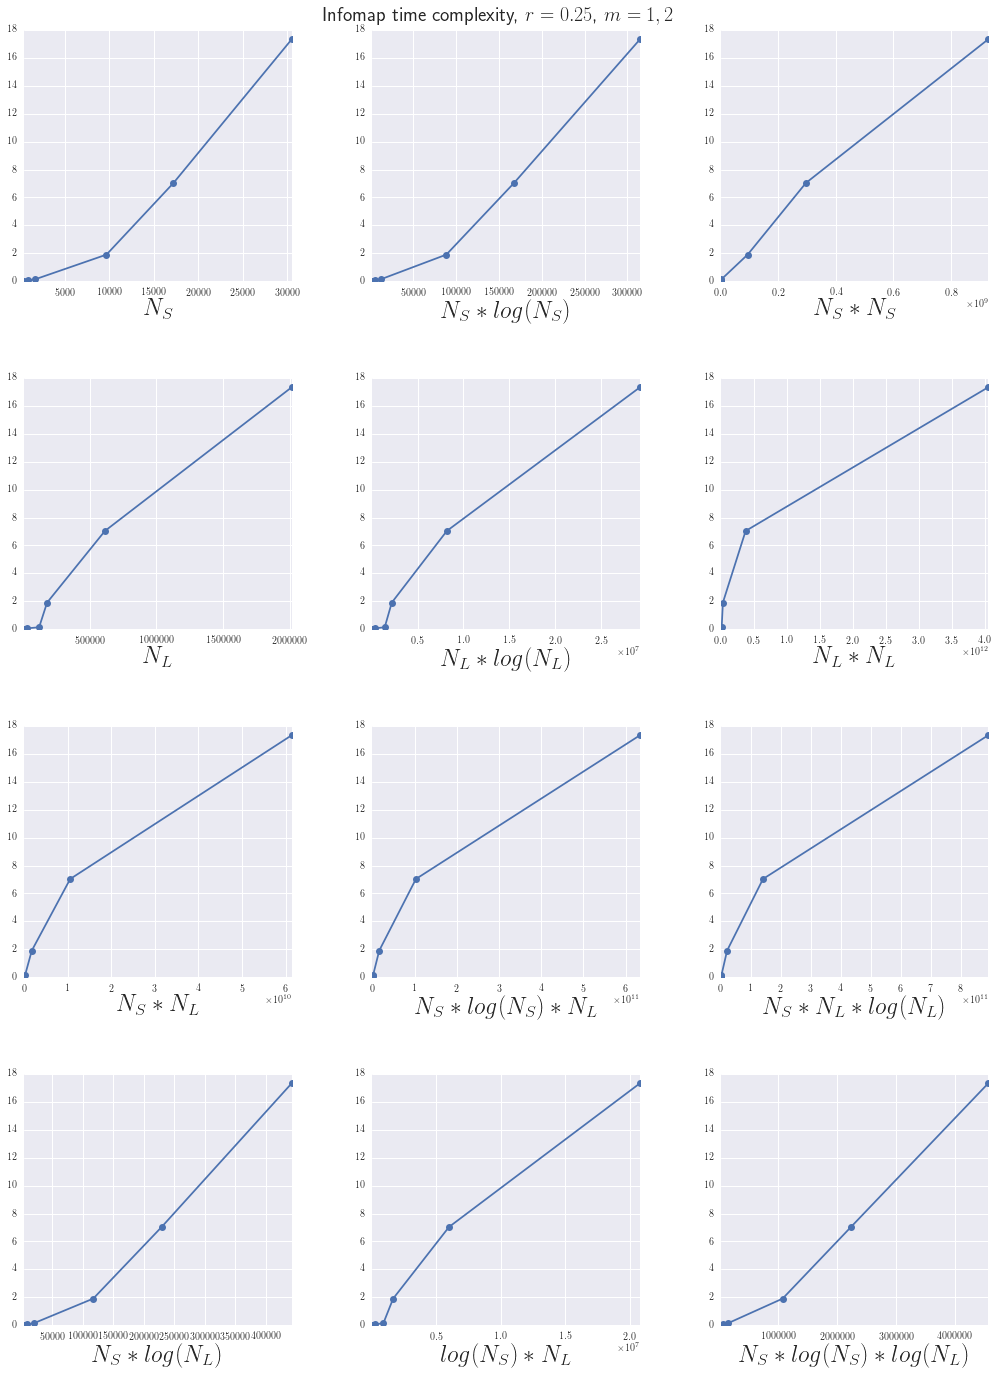

In [14]:
plotTimeComplexities(d25['Seconds'][0:6], N_S=d25['State nodes'][0:6], N_L=d25['Links'][0:6],
                     title="Infomap time complexity, $r=0.25$, $m=1,2$")